Accuracy: 0.9753701034979694

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      3489
           1       1.00      0.96      0.98      4144

    accuracy                           0.98      7633
   macro avg       0.97      0.98      0.98      7633
weighted avg       0.98      0.98      0.98      7633



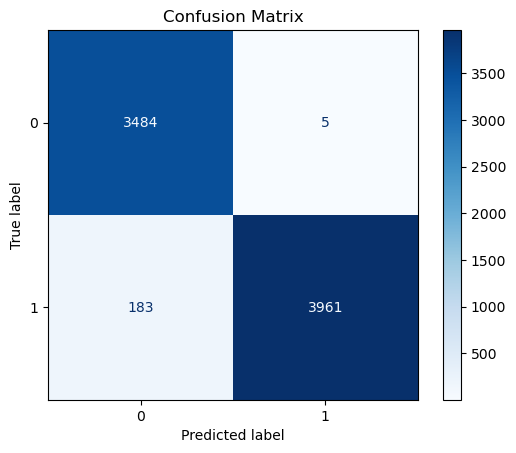

In [1]:
# Step 1: Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay
)
from sklearn.preprocessing import MinMaxScaler
from scipy.sparse import hstack
import matplotlib.pyplot as plt
import pickle

# Step 2: Load dataset
df = pd.read_csv("cleanformodels.csv")

from sklearn.preprocessing import OneHotEncoder, StandardScaler

with open('tfidf_vectorizer.pkl', 'rb') as f:
    tfidf = pickle.load(f)

with open('onehot_encoder.pkl', 'rb') as f:
    encoder = pickle.load(f)

with open('scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)


X_text = tfidf.fit_transform(df['text'])


categorical = df[['sender_username', 'sender_domain']]
X_cat = encoder.fit_transform(categorical)

numerical = df[['urls', 'hour', 'day_of_week']]
scaler = MinMaxScaler()
X_num = scaler.fit_transform(numerical)

from scipy.sparse import hstack

X = hstack([X_text, X_cat, X_num])
y = df['label']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 8: Train Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Step 9: Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 10: Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [2]:
with open('naive_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [4]:
with open('minmax_scaler.pkl','wb') as f:
    pickle.dump(scaler,f)